In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import image
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')

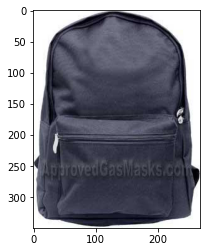

In [3]:
#For data collection I have used caltech 256 dataset and web scrapped  google images of different categories using the extensions available
#1).
data = image.imread('../input/train-data/train/train/backpack/003_0004.jpg')
pyplot.imshow(data)

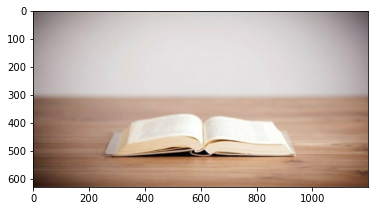

In [4]:
#2).
data = image.imread('../input/train-data/train/train/book/14524.jpg')
pyplot.imshow(data)

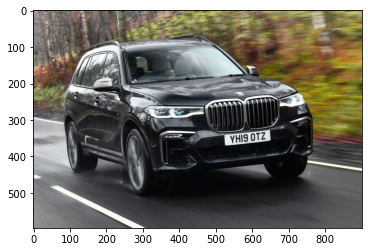

In [5]:
#3).
data = image.imread('../input/train-data/train/train/car/1-bmw-x7-2019-uk-fd-hero-front_0.jpg')
pyplot.imshow(data)

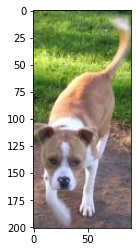

In [6]:
#4)
data = image.imread('../input/train-data/train/train/dog/dog_0001.jpg')
pyplot.imshow(data)

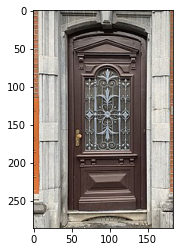

In [8]:
#5)
data = image.imread('../input/train-data/train/train/door/184px-162C_Stationsstraat2C_Maastricht.jpg')
pyplot.imshow(data)

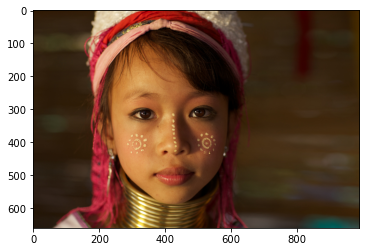

In [21]:
#5)
data = image.imread('../input/train-data/train/train/humans/37878.jpg')
pyplot.imshow(data)

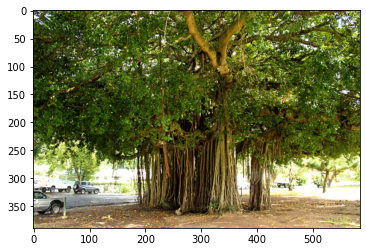

In [22]:
#6)
data = image.imread('../input/train-data/train/train/tree/1gEFvKod8u6VNdVOBXHejkQ.jpeg')
pyplot.imshow(data)

In [9]:
# after trying out different layers i.e only conv, or 3 conv + pool, and trying some different params,
# and learning from different kaggle notebooks ,this is the final model
model = Sequential()
# Covn + pooling
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (64,64,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# conv+pooling
model.add(Conv2D(filters = 16, kernel_size = (3,3),activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [10]:
train_data_gen=ImageDataGenerator(rescale=1./255,horizontal_flip=True)
test_data_gen=ImageDataGenerator(rescale=1./255)

In [11]:
x_train=train_data_gen.flow_from_directory("../input/train-data/train/train",target_size=(64,64),batch_size=16,class_mode='categorical')  

Found 4876 images belonging to 10 classes.


In [12]:
print(x_train.class_indices)

{'backpack': 0, 'book': 1, 'car': 2, 'dog': 3, 'door': 4, 'humans': 5, 'shoes': 6, 'signal-traffic': 7, 'table': 8, 'tree': 9}


In [13]:
x_test=test_data_gen.flow_from_directory("../input/test-data/test/test",target_size=(64,64),batch_size=16,class_mode='categorical') 

Found 1014 images belonging to 10 classes.


In [14]:
print(x_test.class_indices)

{'backpack': 0, 'book': 1, 'car': 2, 'dog': 3, 'door': 4, 'people': 5, 'shoes': 6, 'table': 7, 'traffic-light': 8, 'tree': 9}


In [15]:
# Compile the model
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [16]:
valLoss = model.fit_generator(x_train,steps_per_epoch=300,epochs=30,validation_data=x_test,validation_steps=60)

Epoch 1/30
300/300 [==============================] - 97s 324ms/step - loss: 1.4791 - accuracy: 0.5419 - val_loss: 1.5253 - val_accuracy: 0.5240
Epoch 2/30
300/300 [==============================] - 68s 228ms/step - loss: 1.0006 - accuracy: 0.6893 - val_loss: 1.4621 - val_accuracy: 0.5677
Epoch 3/30
300/300 [==============================] - 64s 214ms/step - loss: 0.8612 - accuracy: 0.7239 - val_loss: 1.4879 - val_accuracy: 0.6135
Epoch 4/30
300/300 [==============================] - 64s 215ms/step - loss: 0.7606 - accuracy: 0.7613 - val_loss: 1.5152 - val_accuracy: 0.6083
Epoch 5/30
300/300 [==============================] - 64s 214ms/step - loss: 0.7112 - accuracy: 0.7734 - val_loss: 1.5281 - val_accuracy: 0.6104
Epoch 6/30
300/300 [==============================] - 66s 220ms/step - loss: 0.6380 - accuracy: 0.7934 - val_loss: 1.5509 - val_accuracy: 0.6594
Epoch 7/30
300/300 [==============================] - 64s 212ms/step - loss: 0.6085 - accuracy: 0.8003 - val_loss: 1.5016 - val_ac

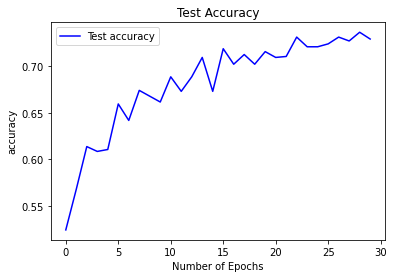

In [17]:
# accuracy curve for test data
plt.plot(valLoss.history['val_accuracy'], color='b', label="Test accuracy")
plt.title("Test Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()
# with each increasing epoch, the model is learning better and accracy is improved

In [26]:
print(x_train.class_indices)

{'backpack': 0, 'book': 1, 'car': 2, 'dog': 3, 'door': 4, 'humans': 5, 'shoes': 6, 'signal-traffic': 7, 'table': 8, 'tree': 9}


In [29]:
from keras.preprocessing import image
img=image.load_img("../input/test-data/test/test/book/1.jpg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)

In [30]:
# the above book is classified correctly
pred=model.predict_classes(x)
pred

array([1])

In [31]:
img=image.load_img("../input/test-data/test/test/car/car_0035.jpg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)

In [33]:
# the above car is classified correctly
pred=model.predict_classes(x)
pred

array([2])

In [79]:
img=image.load_img("../input/test-data/test/test/tree/buddha-thailand.jpg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)

In [80]:
# the above tree is not classified correctly
pred=model.predict_classes(x)
pred

array([1])

In [81]:
img=image.load_img("../input/test-data/test/test/backpack/003_0111.jpg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)

In [83]:
# the above backpack is classified correctly
pred=model.predict_classes(x)
pred

array([0])